<a href="https://colab.research.google.com/github/charlesincharge/CS155/blob/revise-set-1/2022/sets/set1/src/3_notebook_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts G-I: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts G-I by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3G: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3D-F. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [2]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    
    return np.sum((Y - X.dot(w)) ** 2)

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================    
    
    return -2 * (y - np.dot(w, x)) * x ## transpose x???

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    
    N = np.size(X, 0)
    # D = len(w_start)

    # initialize weight vector
    w = w_start

    # initialize final array of all weight vectors from each iter
    # W = np.zeros(shape=(N_epochs, D))
    losses = np.zeros(shape=(N_epochs, ))
    for iter in range(N_epochs):
        # iterate through each point
        for i in np.random.permutation(N):
            # w -= eta * gradient(X[i], Y[i], w)
            # print(np.shape(X))
            w -= eta * gradient(X[i, :], Y[i], w)

        # W[iter] = w
        losses[iter] = loss(X, Y, w)
    
    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [4]:
#==============================================
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/data/sgd_data.csv')
# data is of form x1,x2,x3,x4,y
# Y is last element
# X is [0:4]
print(np.shape(data))
print(np.shape(data[:, -1]))
print(np.shape(data[:]))
# (1000, 4)
X = data[:, :-1] # does not include x0 = 1 

# want array that is X long by 1 wide with only 1s
x0 = np.full((len(X), 1), 1) # (1000, 1)
X = np.concatenate((x0, X), axis=1) # (1000, 5)
Y = data[:, -1] # (1000,)
print(np.size(Y))

N_epochs = 800
eta = np.exp(-15)
w = [0.001, 0.001, 0.001, 0.001, 0.001] # includes b 

final_weights, losses = SGD(X, Y, w, eta, N_epochs)

print(final_weights[:])
print(np.shape(final_weights))


(1000, 5)
(1000,)
(1000, 5)
1000
[ -0.22717795  -5.94210176   3.94391361 -11.72383074   8.78568658]
(5,)


## Problem 3H: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

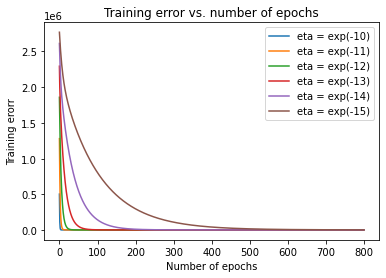

In [5]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================

eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]

plt.figure()

for eta in eta_vals:
    __, losses = SGD(X, Y, w, eta, N_epochs)
    plt.plot(range(N_epochs), losses)

plt.title("Training error vs. number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Training erorr")
plt.legend(['eta = exp(-10)', 'eta = exp(-11)', 'eta = exp(-12)', 'eta = exp(-13)', 'eta = exp(-14)', 'eta = exp(-15)'], loc = 'best')
plt.show()

## Problem 3I

Provide your code for computing the least-squares analytical solution below.

In [6]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================
term1 = np.linalg.inv(np.dot(np.transpose(X), X))
term2 = np.dot(np.transpose(X), Y)
w = np.dot(term1, term2)

print(w)

# term1 = np.linalg.inv(np.dot(X, np.transpose(X)))
# term2 = np.dot(np.transpose(X), Y)
# weight = np.dot(term1, term2)

# print(weight)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
